In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

sun_hours = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
b0, b1, b2 = 2, 1.5, -0.05
growth = b0 + b1*sun_hours + b2*sun_hours**2 + np.random.normal(0, 0.5, size=sun_hours.shape)

data = pd.DataFrame({'sun_hours': sun_hours, 'growth': growth})
print("Згенеровані дані:")
data

Згенеровані дані:


,sun_hours,growth
0,2,5.048357
1,3,5.980868
2,4,7.523844
3,5,9.011515
4,6,9.082923
5,7,9.932932
6,8,11.589606
7,9,11.833717
8,10,11.765263
9,11,12.721280


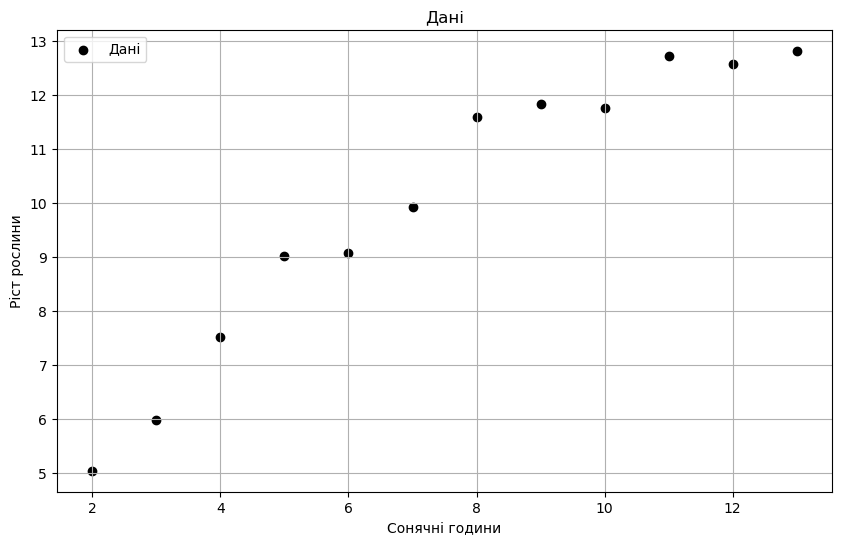

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(sun_hours, growth, color='black', label='Дані')
plt.xlabel('Сонячні години')
plt.ylabel('Ріст рослини')
plt.title('Дані')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
n = len(sun_hours)
sum_x = np.sum(sun_hours)
sum_y = np.sum(growth)
sum_x2 = np.sum(sun_hours**2)
sum_xy = np.sum(sun_hours * growth)

a = (n*sum_xy - sum_x*sum_y) / (n*sum_x2 - sum_x**2)
b = (sum_y - a*sum_x) / n

print("\n--- Лінійна регресія ---")
print(f"Сума x: {sum_x}, сума y: {sum_y}, сума x^2: {sum_x2}, сума x*y: {sum_xy}")
print(f"Отримані параметри: a = {a:.3f}, b = {b:.3f}")

y_linear = a*sun_hours + b


--- Лінійна регресія ---
Сума x: 90, сума y: 119.87573183530243, сума x^2: 818, сума x*y: 1001.469596243168
Отримані параметри: a = 0.716, b = 4.619


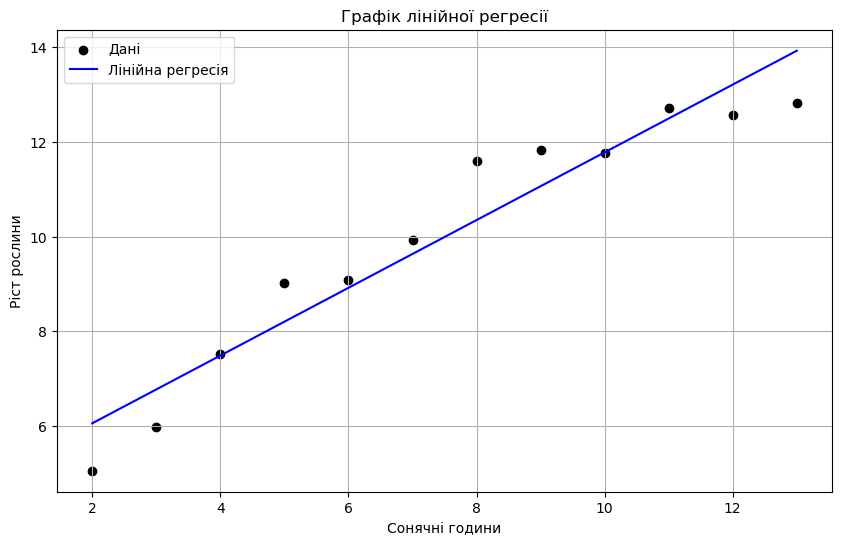

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(sun_hours, growth, color='black', label='Дані')
plt.plot(sun_hours, y_linear, color='blue', label='Лінійна регресія')
plt.xlabel('Сонячні години')
plt.ylabel('Ріст рослини')
plt.title('Графік лінійної регресії')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
X_quad = np.column_stack((np.ones(n), sun_hours, sun_hours**2))
Y = growth.reshape(-1, 1)
B = np.linalg.inv(X_quad.T @ X_quad) @ X_quad.T @ Y

print("\n--- Квадратична регресія ---")
print("Матриця сум:")
sum_table = pd.DataFrame({
    "sum_x": [np.sum(sun_hours)],
    "sum_x2": [np.sum(sun_hours**2)],
    "sum_x3": [np.sum(sun_hours**3)],
    "sum_x4": [np.sum(sun_hours**4)],
    "sum_y": [np.sum(growth)],
    "sum_xy": [np.sum(sun_hours*growth)],
    "sum_x2y": [np.sum(sun_hours**2*growth)]
})
print(sum_table)
print(f"Отримані параметри: b0 = {B[0,0]:.3f}, b1 = {B[1,0]:.3f}, b2 = {B[2,0]:.3f}")

y_quad = B[0] + B[1]*sun_hours + B[2]*sun_hours**2


--- Квадратична регресія ---
Матриця сум:
   sum_x  sum_x2  sum_x3  sum_x4       sum_y       sum_xy      sum_x2y
0     90     818    8280   89270  119.875732  1001.469596  9625.386346
Отримані параметри: b0 = 1.890, b1 = 1.640, b2 = -0.062


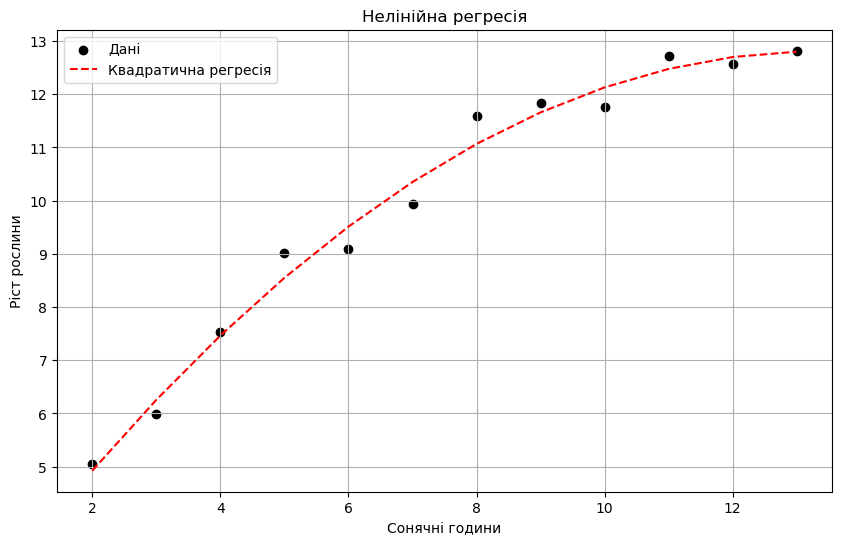

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(sun_hours, growth, color='black', label='Дані')
plt.plot(sun_hours, y_quad, color='red', linestyle='--', label='Квадратична регресія')
plt.xlabel('Сонячні години')
plt.ylabel('Ріст рослини')
plt.title('Нелінійна регресія')
plt.legend()
plt.grid(True)
plt.show()

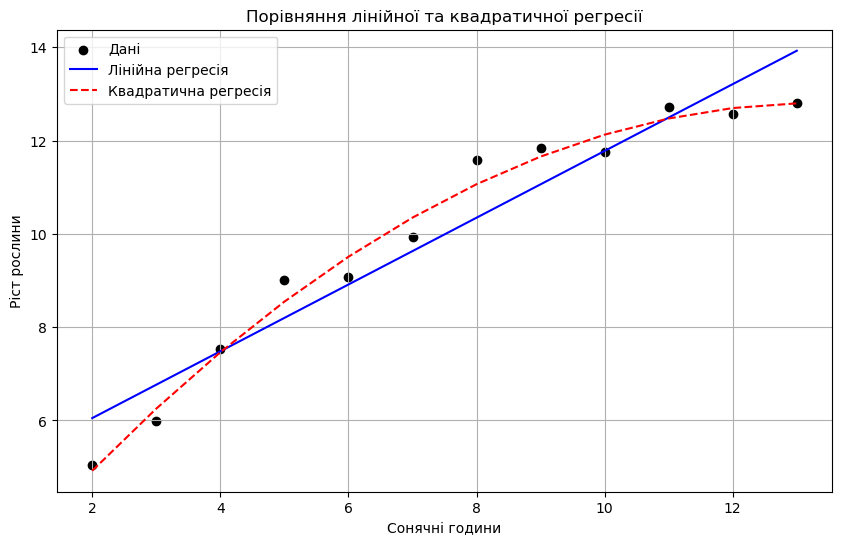

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(sun_hours, growth, color='black', label='Дані')
plt.plot(sun_hours, y_linear, color='blue', label='Лінійна регресія')
plt.plot(sun_hours, y_quad, color='red', linestyle='--', label='Квадратична регресія')
plt.xlabel('Сонячні години')
plt.ylabel('Ріст рослини')
plt.title('Порівняння лінійної та квадратичної регресії')
plt.legend()
plt.grid(True)
plt.show()

Згенеровані дані:
    sun_hours     growth
0           2   5.048357
1           3   5.980868
2           4   7.523844
3           5   9.011515
4           6   9.082923
5           7   9.932932
6           8  11.589606
7           9  11.833717
8          10  11.765263
9          11  12.721280
10         12  12.568291
11         13  12.817135

--- Лінійна регресія ---
Сума x: 90, сума y: 119.87573183530243, сума x^2: 818, сума x*y: 1001.469596243168
Отримані параметри: a = 0.716, b = 4.619

--- Квадратична регресія ---
   sum_x  sum_x2  sum_x3  sum_x4       sum_y       sum_xy      sum_x2y
0     90     818    8280   89270  119.875732  1001.469596  9625.386346
Отримані параметри: b0 = 1.890, b1 = 1.640, b2 = -0.062

RMSE лінійної моделі: 0.520
RMSE квадратичної моделі: 0.098

Прогноз для тестової точки (sun_hours=7.5):
Лінійна модель: 9.990
Квадратична модель: 10.723


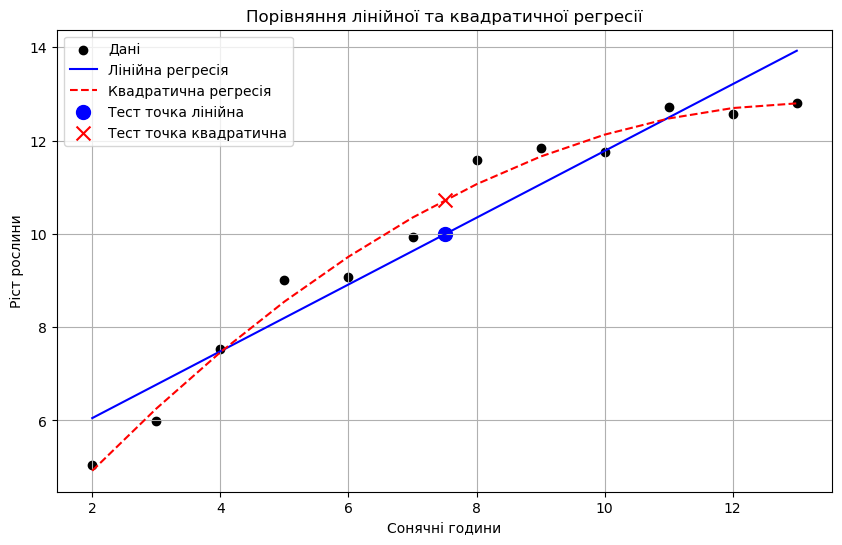

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Генерація даних
np.random.seed(42)

sun_hours = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
b0, b1, b2 = 2, 1.5, -0.05
growth = b0 + b1*sun_hours + b2*sun_hours**2 + np.random.normal(0, 0.5, size=sun_hours.shape)

data = pd.DataFrame({'sun_hours': sun_hours, 'growth': growth})
print("Згенеровані дані:")
print(data)

# 2. Лінійна регресія y = a*x + b
n = len(sun_hours)
sum_x = np.sum(sun_hours)
sum_y = np.sum(growth)
sum_x2 = np.sum(sun_hours**2)
sum_xy = np.sum(sun_hours * growth)

a = (n*sum_xy - sum_x*sum_y) / (n*sum_x2 - sum_x**2)
b = (sum_y - a*sum_x) / n

print("\n--- Лінійна регресія ---")
print(f"Сума x: {sum_x}, сума y: {sum_y}, сума x^2: {sum_x2}, сума x*y: {sum_xy}")
print(f"Отримані параметри: a = {a:.3f}, b = {b:.3f}")

y_linear = a*sun_hours + b

# 3. Квадратична регресія y = b0 + b1*x + b2*x^2
X_quad = np.column_stack((np.ones(n), sun_hours, sun_hours**2))
Y = growth.reshape(-1, 1)
B = np.linalg.inv(X_quad.T @ X_quad) @ X_quad.T @ Y

print("\n--- Квадратична регресія ---")
sum_table = pd.DataFrame({
    "sum_x": [np.sum(sun_hours)],
    "sum_x2": [np.sum(sun_hours**2)],
    "sum_x3": [np.sum(sun_hours**3)],
    "sum_x4": [np.sum(sun_hours**4)],
    "sum_y": [np.sum(growth)],
    "sum_xy": [np.sum(sun_hours*growth)],
    "sum_x2y": [np.sum(sun_hours**2*growth)]
})
print(sum_table)
print(f"Отримані параметри: b0 = {B[0,0]:.3f}, b1 = {B[1,0]:.3f}, b2 = {B[2,0]:.3f}")

y_quad = B[0] + B[1]*sun_hours + B[2]*sun_hours**2

# 4. Обчислення RMSE
rmse_linear = np.mean((growth - y_linear)**2)
rmse_quad = np.mean((growth - y_quad.flatten())**2)
print(f"\nRMSE лінійної моделі: {rmse_linear:.3f}")
print(f"RMSE квадратичної моделі: {rmse_quad:.3f}")

# 5. Тестова точка
test_point = 7.5
pred_linear = a*test_point + b
pred_quad = B[0] + B[1]*test_point + B[2]*test_point**2
print(f"\nПрогноз для тестової точки (sun_hours={test_point}):")
print(f"Лінійна модель: {pred_linear:.3f}")
print(f"Квадратична модель: {pred_quad[0]:.3f}")

# 6. Графіки
plt.figure(figsize=(10,6))
plt.scatter(sun_hours, growth, color='black', label='Дані')
plt.plot(sun_hours, y_linear, color='blue', label='Лінійна регресія')
plt.plot(sun_hours, y_quad, color='red', linestyle='--', label='Квадратична регресія')
plt.scatter(test_point, pred_linear, color='blue', marker='o', s=100, label='Тест точка лінійна')
plt.scatter(test_point, pred_quad, color='red', marker='x', s=100, label='Тест точка квадратична')
plt.xlabel('Сонячні години')
plt.ylabel('Ріст рослини')
plt.title('Порівняння лінійної та квадратичної регресії')
plt.legend()
plt.grid(True)
plt.show()
